<h1><strong><u>Multi-Layered Perceptron Model</u></strong></h1>

In [59]:
%%capture
%run ../DataPreparation.ipynb

<h2><strong><u>MLP Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

In [60]:
# Validation Curve for Testing Effect of Neuron Count

pipeline = Pipeline(
    [
        ("ct", ct),
        ("clf", MLPClassifier(max_iter=2000, random_state=1))
    ]
)

hidden_layers_test = [(4,), (8,), (12,), (16,), (20,), (24,)]
neurons = list(range(4, 25, 4))

train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__hidden_layer_sizes",
                                                   param_range=hidden_layers_test,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

vc_dict[f"MLP Classifier: Accuracy VC (Neuron Count with One Layer) 1"] = [["Neuron Count", "Accuracy Score"],
                                                                          neurons,
                                                                          [train_scores_mean, validation_scores_mean],
                                                                          ["Train Scores", "Validation Scores"]]

In [61]:
# Validation Curve for Testing Effect of Adding Hidden Layers

pipeline = Pipeline(
    [
        ("ct", ct),
        ("clf", MLPClassifier(max_iter=2000, random_state=1))
    ]
)

hidden_layers_sizes = [(8,), (8,2), (8,3), (8,4), (8,5)]
hidden_layers = list(range(1,6))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__hidden_layer_sizes",
                                                   param_range=hidden_layers_sizes,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

vc_dict[f"MLP Classifier: Accuracy VC (Hidden Layer Size)"] = [["Hidden Layer Size", "Accuracy Score"],
                                                                hidden_layers,
                                                                [train_scores_mean, validation_scores_mean],
                                                                ["Train Scores", "Validation Scores"]]

In [62]:
# Validation Curve for Testing Regularization Coefficient Ranges

pipeline = Pipeline(
    [
        ("ct", ct),
        ("clf", MLPClassifier(hidden_layer_sizes=(8,), max_iter=2000, random_state=1)),
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1]
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

vc_dict[f"MLP Classifier: Accuracy VC (Reg Coef. 1)"] = [["Regularization Coefficient", "Accuracy Score"],
                                                       alphas,
                                                       True,
                                                       [train_scores_mean, validation_scores_mean],
                                                       ["Train Scores", "Validation Scores"]]

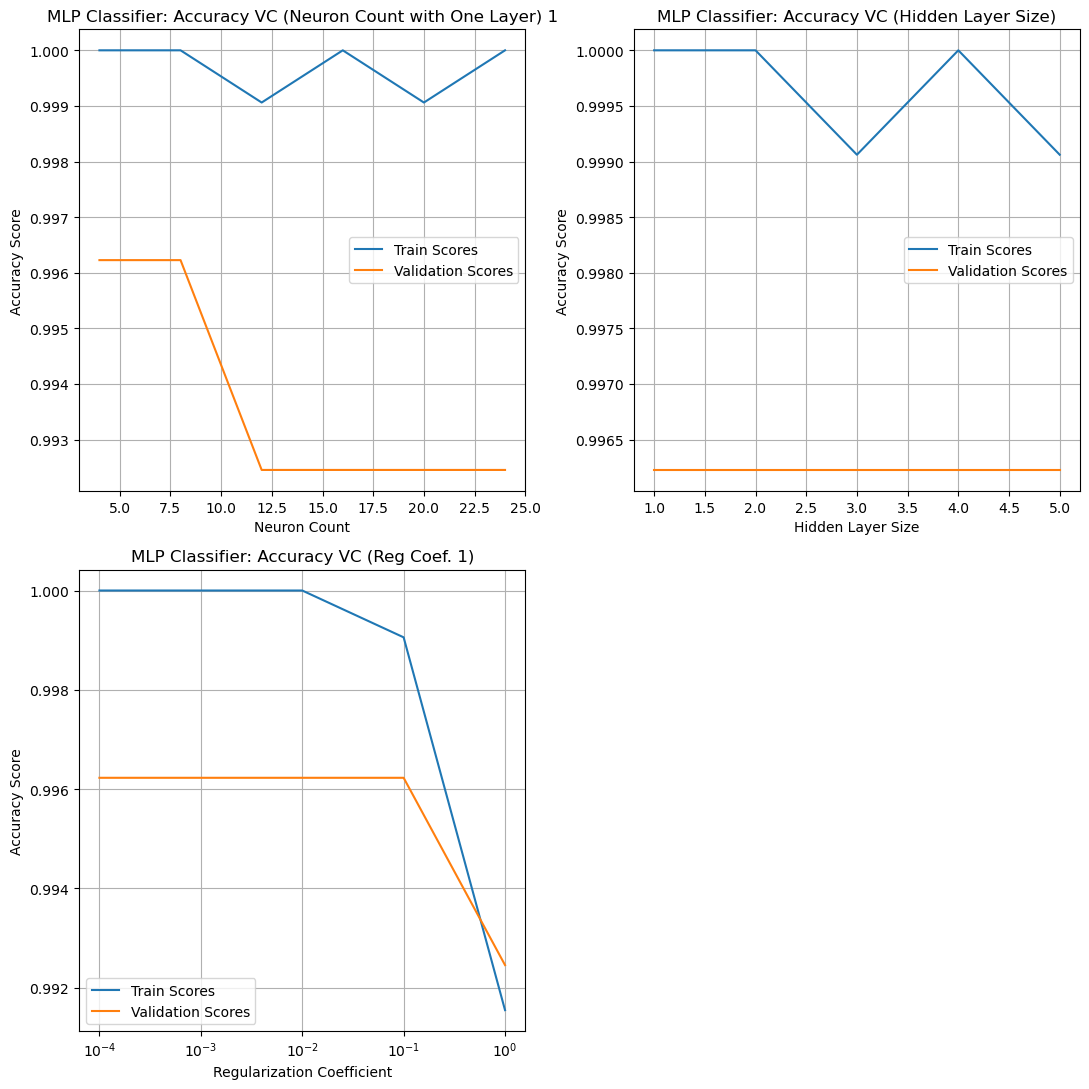

In [63]:
# Create an even number of subplots (e.g., 3 rows, 2 columns for 5 plots)
fig, axs = plt.subplots(2, 2, figsize=(11,11))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in vc_dict.items():
    if value[2] == True:
        axs[count].semilogx(value[1], value[3][0], label=value[4][0])
        axs[count].semilogx(value[1], value[3][1], label=value[4][1])
    else:
        axs[count].plot(value[1], value[2][0], label=value[3][0])
        axs[count].plot(value[1], value[2][1], label=value[3][1])
    axs[count].set_xlabel(value[0][0])
    axs[count].set_ylabel(value[0][1])
    axs[count].set_title(key)
    axs[count].grid()
    axs[count].minorticks_off()
    axs[count].legend()
    count += 1

fig.delaxes(axs[count]) 
plt.tight_layout()
plt.show()

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [71]:
pipeline = Pipeline(
    [
        ("ct", ct),
        ("clf", MLPClassifier(max_iter=2000, random_state=1)),
    ]
)

cv_params = {
    'clf__hidden_layer_sizes': [(4,), (6,), (8,), (10,)]
}
grid_search = GridSearchCV(pipeline, cv_params, cv=5, n_jobs=-1, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)
mlp_classifier = grid_search.best_estimator_
print(grid_search.best_params_)

def mlp_clickbait_classifier():
    return mlp_classifier


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 4/5] END ......clf__hidden_layer_sizes=(4,);, score=1.000 total time=   0.1s
[CV 5/5] END ......clf__hidden_layer_sizes=(4,);, score=0.981 total time=   0.2s
[CV 2/5] END ......clf__hidden_layer_sizes=(6,);, score=0.981 total time=   0.2s
[CV 1/5] END ......clf__hidden_layer_sizes=(4,);, score=1.000 total time=   0.2s
[CV 3/5] END ......clf__hidden_layer_sizes=(4,);, score=1.000 total time=   0.2s
[CV 3/5] END ......clf__hidden_layer_sizes=(6,);, score=1.000 total time=   0.2s
[CV 1/5] END ......clf__hidden_layer_sizes=(6,);, score=1.000 total time=   0.2s
[CV 2/5] END ......clf__hidden_layer_sizes=(4,);, score=1.000 total time=   0.2s
[CV 1/5] END ......clf__hidden_layer_sizes=(8,);, score=1.000 total time=   0.1s
[CV 1/5] END .....clf__hidden_layer_sizes=(10,);, score=1.000 total time=   0.1s
[CV 2/5] END ......clf__hidden_layer_sizes=(8,);, score=0.981 total time=   0.1s
[CV 4/5] END ......clf__hidden_layer_sizes=(6,);,

<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
All validation curve tests yielded positive results. It seems the a low neuron count with a single layer and low regularization is the best as suggested by these tests. There was minimal fluctuation in the number of hidden layers and the regularization which means that those hyperparameters will make only a minimal difference in the accuracy score. Therefore, I decided to exclude them from the GridSearchCV test.

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curve</u></strong></h4>

In [72]:
for key, value in clf_metrics.items():
    mlp_train_sizes, mlp_train_scores, mlp_validation_scores = learning_curve(
        mlp_classifier,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    mlp_train_scores_mean = np.mean(mlp_train_scores, axis=1)
    mlp_train_scores_std = np.std(mlp_train_scores, axis=1)
    mlp_validation_scores_mean = np.mean(mlp_validation_scores, axis=1)
    mlp_validation_scores_std = np.std(mlp_validation_scores, axis=1)

        # Calculate spread of data around the mean
    mlp_train_range_minus = mlp_train_scores_mean - mlp_train_scores_std
    mlp_train_range_plus = mlp_train_scores_mean + mlp_train_scores_std
    mlp_validation_range_minus = mlp_validation_scores_mean - mlp_validation_scores_std
    mlp_validation_range_plus = mlp_validation_scores_mean + mlp_validation_scores_std

    lc_dict[key] = [[mlp_train_scores_mean, mlp_validation_scores_mean],
                    [mlp_train_range_minus, mlp_train_range_plus], 
                    [mlp_validation_range_minus, mlp_validation_range_plus], 
                    mlp_train_sizes]

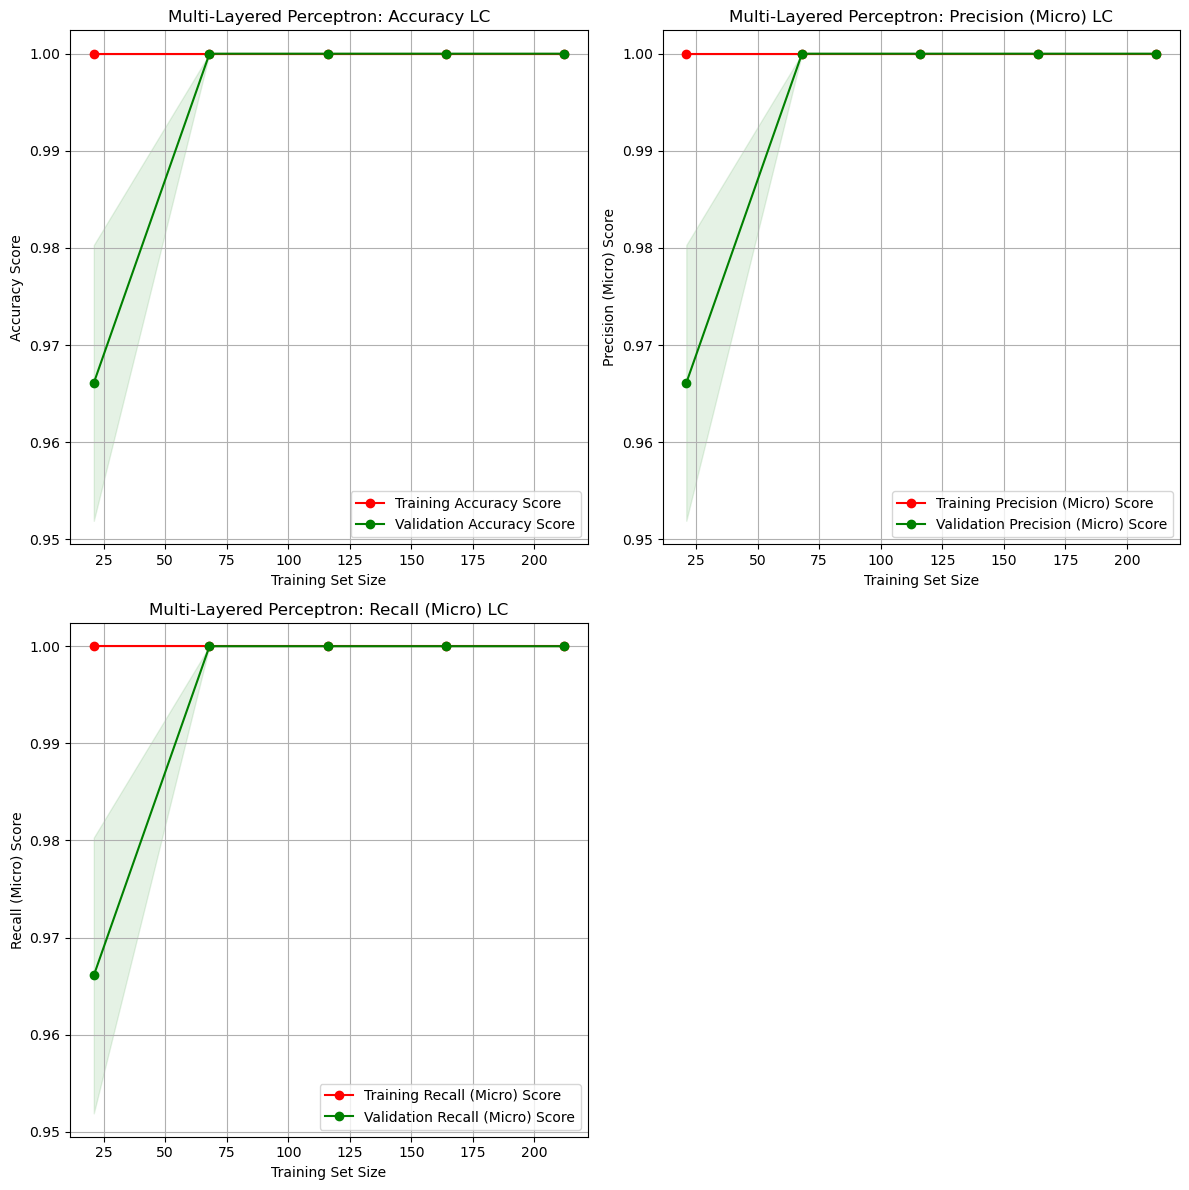

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in lc_dict.items():
    axs[count].set_title(f"Multi-Layered Perceptron: {key} LC")
    axs[count].set_xlabel("Training Set Size")
    axs[count].set_ylabel(f"{key} Score")
    axs[count].grid()

    axs[count].fill_between(value[3], value[1][0], value[1][1], alpha=0.1, color="r")
    axs[count].fill_between(value[3], value[2][0], value[2][1], alpha=0.1, color="g")
    axs[count].plot(value[3], value[0][0], 'o-', color="r", label=f"Training {key} Score")
    axs[count].plot(value[3], value[0][1], 'o-', color="g", label=f"Validation {key} Score")
    axs[count].legend()
    count += 1
    
fig.delaxes(axs[count]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [74]:
for key, value in clf_metrics.items():
    nb_training_values = cross_val_score(mlp_classifier, X_train, y=y_train, scoring=value, cv=5)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    cvs_dict[key] = [nb_training_values, [average, stDev]]

In [75]:
for key, value in cvs_dict.items():
    print(f"{key}")
    print("CV Training Scores: ", value[0])
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(value[1][0].round(2)), "\u00B1", "{:.2f}%".format(value[1][1].round(4)*100), "\n")

Accuracy
CV Training Scores:  [1.         1.         1.         1.         0.98113208]
Training Average and Standard Error:  1.00% ± 0.75% 

Precision (Micro)
CV Training Scores:  [1.         1.         1.         1.         0.98113208]
Training Average and Standard Error:  1.00% ± 0.75% 

Recall (Micro)
CV Training Scores:  [1.         1.         1.         1.         0.98113208]
Training Average and Standard Error:  1.00% ± 0.75% 



Text(0.5, 1.0, 'Multi-Layered Perceptron: Confusion Matrix (Evaluation)')

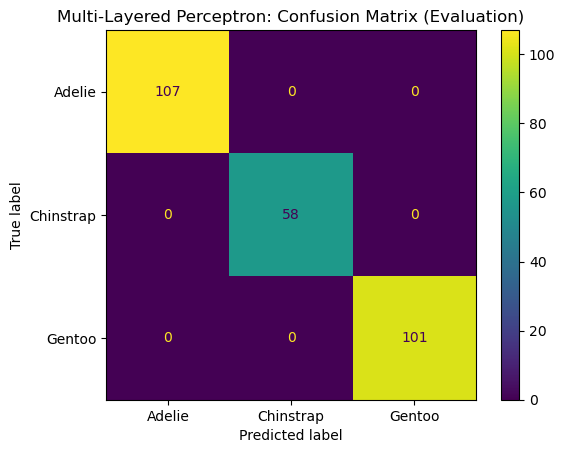

In [77]:
#Training Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(mlp_classifier, X_train, y_train)
disp.ax_.set_title("Multi-Layered Perceptron: Confusion Matrix (Evaluation)")

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
In the evaluation of my selected Multi-Layered Perceptron model, I found positive results for all evaluation methods. All of the evaluation metric scored nearly perfect. This model is a exceptionally strong candidate to be chosen as the final model after the 'Final Model Selection' phase.